In [11]:
!pip install pandas numpy

/var/folders/f6/pw66zgd15xv4cth10rsvxhxc0000gn/T/ipykernel_14460/320331356.py:18: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start_date, end=end_date, progress=False)


<Figure size 640x480 with 0 Axes>

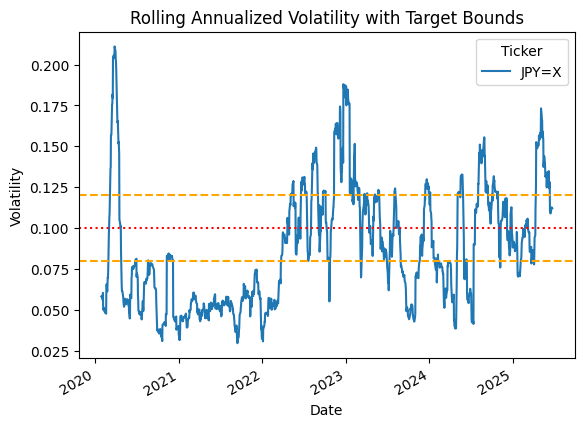

<Figure size 640x480 with 0 Axes>

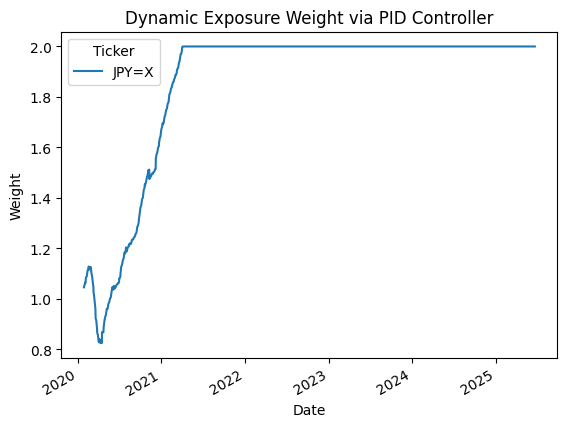

<Figure size 640x480 with 0 Axes>

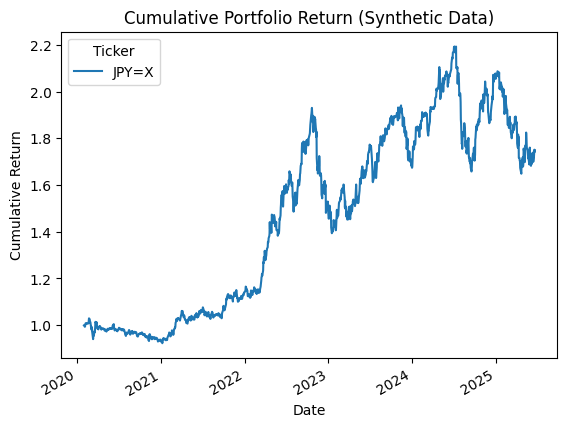

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

# -- Synthetic demonstration of homeostatic risk management --
# Replace `prices` below with your real `df['Adj Close']` series

# 1. Download S&P500 Adj Close from Yahoo Finance
#    here we pull from 2020-01-01 to today
# symbol = "^GSPC"
symbol = "JPY=X"
start_date = "2020-01-01"
# end_date = "2022-01-01"
end_date = pd.Timestamp.today().strftime("%Y-%m-%d")


df = yf.download(symbol, start=start_date, end=end_date, progress=False)
prices = df["Close"].dropna()


# 2. Calculate daily returns
returns = prices.pct_change().dropna()

# 3. Compute rolling annualized volatility (20-day window)
window = 20
vol = returns.rolling(window).std() * np.sqrt(252)

# 4. Define homeostatic parameters
target_vol = 0.10  # 10% annual volatility
tol = 0.02         # ±2% tolerance
vol_upper = target_vol + tol
vol_lower = target_vol - tol

# 5. PID controller parameters
Kp, Ki, Kd = 1.0, 0.1, 0.1

# 6. Compute PID signal
error = vol - target_vol
cum_error = error.cumsum()
diff_error = error.diff().fillna(0)
u = Kp * error + Ki * cum_error + Kd * diff_error

# 7. Determine dynamic exposure weight (clamp between 0 and 2)
weight = (1 - u).clip(lower=0, upper=2)

# 8. Calculate portfolio returns and cumulative performance
port_ret = weight.shift(1) * returns
cum_port = (1 + port_ret).cumprod()

# 9. Plot results
# Rolling Annualized Volatility with Target Bounds
plt.figure()
vol.plot()
plt.axhline(target_vol, linestyle=":", color='red', label='Target Volatility')
plt.axhline(vol_upper, linestyle="--", color='orange', label='Upper Bound')
plt.axhline(vol_lower, linestyle="--", color='orange', label='Lower Bound')
plt.title('Rolling Annualized Volatility with Target Bounds')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.show()

# Dynamic Exposure Weight via PID Controller
plt.figure()
weight.plot()
plt.title('Dynamic Exposure Weight via PID Controller')
plt.xlabel('Date')
plt.ylabel('Weight')
plt.show()

# Cumulative Portfolio Return (Synthetic Data)
plt.figure()
cum_port.plot()
plt.title('Cumulative Portfolio Return (Synthetic Data)')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.show()


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

# -- Synthetic demonstration of homeostatic risk management --
# Replace `prices` below with your real `df['Adj Close']` series

# 1. Download S&P500 Adj Close from Yahoo Finance
#    here we pull from 2020-01-01 to today
symbol = "^GSPC"
start_date = "2025-01-01"
end_date = pd.Timestamp.today().strftime("%Y-%m-%d")

df = yf.download(symbol, start=start_date, end=end_date, progress=False)
df.tail()

/var/folders/f6/pw66zgd15xv4cth10rsvxhxc0000gn/T/ipykernel_14460/3216803434.py:15: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start_date, end=end_date, progress=False)


Price,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,
2025-06-13,5976.970215,6026.160156,5963.209961,6000.560059,5258910000
2025-06-16,6033.109863,6050.830078,6004.000000,6004.000000,5111710000
2025-06-17,5982.720215,6023.250000,5974.799805,6012.149902,4955700000
2025-06-18,5980.870117,6018.250000,5971.890137,5987.930176,5106470000
2025-06-20,5967.839844,6018.200195,5952.560059,5999.669922,7451500000
